---
---
---
---
# **Descripción del problema, EDA y Preprocesamiento**
---
---
---
---

$\ $

---
---
---
## **1. Carga de las librerías necesarias**
---
---
---

Lo primero que haremos será cargar las librerías necesarias para el análisis de los datos y la implementación de los modelos de machine learning.

In [347]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

---
---
---
## **2. Descripción del problema**
---
---
---

En este desafío, analizaremos la vacunación, una medida clave de salud pública que se utiliza para combatir las enfermedades infecciosas. Las vacunas proporcionan inmunización a las personas, y una inmunización suficiente en una comunidad puede reducir aún más la propagación de enfermedades a través de la "inmunidad colectiva".

Este problema analiza la respuesta de la salud pública a una pandemia reciente de enfermedad respiratoria importante. A principios de la primavera de 2009, una pandemia causada por el virus de la influenza H1N1, coloquialmente llamado "gripe porcina", se extendió por todo el mundo. Los investigadores estiman que en el primer año, fue responsable de entre 151.000 y 575.000 muertes en todo el mundo .

En octubre de 2009 se puso a disposición del público una vacuna contra el virus de la gripe H1N1. A finales de 2009 y principios de 2010, Estados Unidos llevó a cabo la Encuesta Nacional sobre la Gripe H1N1 2009. En esta encuesta telefónica se preguntó a los encuestados si habían recibido las vacunas contra la gripe H1N1 y la gripe estacional, junto con preguntas sobre sí mismos. Estas preguntas adicionales abarcaron su contexto social, económico y demográfico, sus opiniones sobre los riesgos de la enfermedad y la eficacia de la vacuna, y sus comportamientos para mitigar la transmisión. Una mejor comprensión de cómo se asocian estas características con los patrones de vacunación personales puede proporcionar orientación para futuras iniciativas de salud pública.

Así, el objetvo de este desafío es predecir la probabilidad de que las personas reciban las vacunas contra la gripe H1N1 y la gripe estacional. En concreto, predeciremos dos probabilidades: una para `h1n1_vacciney` otra para `seasonal_vaccine`.

---
---
### **2.1. Etiquetas (Labels)**
---
---

Para esta competición hay dos variables objetivo:

- **`h1n1_vaccine`** $\Longrightarrow$ Si el encuestado recibió la vacuna contra la gripe H1N1.
- **`seasonal_vaccine`** $\Longrightarrow$ Si el encuestado recibió la vacuna contra la gripe estacional.

Ambas son variables binarias: `0 = No` y `1 = Sí`. Algunos encuestados no recibieron ninguna de las vacunas, otros solo recibieron una y algunos recibieron ambas. Esto se formula como un problema de múltiples etiquetas (y no de múltiples clases).

---
---
### **2.2. Caraacterísticas (Features)**
---
---

Se le proporciona un conjunto de datos con 36 columnas. La primera columna **`respondent_id`** es un identificador único y aleatorio. Las 35 características restantes se describen a continuación.

Para todas las variables binarias: `0 = No` y `1 = Sí`.

- **`h1n1_concern`** $\Longrightarrow$ Nivel de preocupación por la gripe H1N1.  
  - `0` = Nada preocupado  
  - `1` = No muy preocupado  
  - `2` = Algo preocupado  
  - `3` = Muy preocupado  

- **`h1n1_knowledge`** $\Longrightarrow$ Nivel de conocimientos sobre la gripe H1N1.  
  - `0` = Ningún conocimiento  
  - `1` = Un poco de conocimiento  
  - `2` = Mucho conocimiento  

- **`behavioral_antiviral_meds`** $\Longrightarrow$ Ha tomado medicamentos antivirales. (binario)  
- **`behavioral_avoidance`** $\Longrightarrow$ Ha evitado el contacto cercano con otras personas con síntomas similares a los de la gripe. (binario)  
- **`behavioral_face_mask`** $\Longrightarrow$ Ha comprado una mascarilla. (binario)  
- **`behavioral_wash_hands`** $\Longrightarrow$ Se ha lavado las manos con frecuencia o ha utilizado desinfectante para manos. (binario)  
- **`behavioral_large_gatherings`** $\Longrightarrow$ Ha reducido el tiempo en grandes reuniones. (binario)  
- **`behavioral_outside_home`** $\Longrightarrow$ Ha reducido el contacto con personas fuera de su propio hogar. (binario)  
- **`behavioral_touch_face`** $\Longrightarrow$ Ha evitado tocarse los ojos, la nariz o la boca. (binario)  

- **`doctor_recc_h1n1`** $\Longrightarrow$ El médico recomendó la vacuna contra la gripe H1N1. (binario)  
- **`doctor_recc_seasonal`** $\Longrightarrow$ El médico recomendó la vacuna contra la gripe estacional. (binario)  

- **`chronic_med_condition`** $\Longrightarrow$ Tiene alguna de las siguientes condiciones médicas crónicas: asma u otra condición pulmonar, diabetes, una condición cardíaca, una condición renal, anemia de células falciformes u otra anemia, una condición neurológica o neuromuscular, una condición hepática o un sistema inmunológico debilitado causado por una enfermedad crónica o por medicamentos tomados para una enfermedad crónica. (binario)  

- **`child_under_6_months`** $\Longrightarrow$ Tiene contacto estrecho regular con un niño menor de seis meses. (binario)  
- **`health_worker`** $\Longrightarrow$ Es un trabajador de la salud. (binario)  
- **`health_insurance`** $\Longrightarrow$ Tiene seguro médico. (binario)  

- **`opinion_h1n1_vacc_effective`** $\Longrightarrow$ Opinión del encuestado sobre la eficacia de la vacuna H1N1.  
  - `1` = Nada efectivo  
  - `2` = Poco efectivo  
  - `3` = No sé  
  - `4` = Algo efectivo  
  - `5` = Muy efectivo  

- **`opinion_h1n1_risk`** $\Longrightarrow$ Opinión del encuestado sobre el riesgo de enfermarse de gripe H1N1 sin vacuna.  
  - `1` = Muy bajo  
  - `2` = Algo bajo  
  - `3` = No sé  
  - `4` = Algo alto  
  - `5` = Muy alto  

- **`opinion_h1n1_sick_from_vacc`** $\Longrightarrow$ La preocupación del encuestado de enfermarse por recibir la vacuna H1N1.  
  - `1` = Nada preocupado  
  - `2` = No muy preocupado  
  - `3` = No sé  
  - `4` = Algo preocupado  
  - `5` = Muy preocupado  

- **`opinion_seas_vacc_effective`** $\Longrightarrow$ Opinión de los encuestados sobre la eficacia de la vacuna contra la gripe estacional.  
  - `1` = Nada efectivo  
  - `2` = Poco efectivo  
  - `3` = No sé  
  - `4` = Algo efectivo  
  - `5` = Muy efectivo  

- **`opinion_seas_risk`** $\Longrightarrow$ Opinión del encuestado sobre el riesgo de enfermarse de gripe estacional sin vacuna.  
  - `1` = Muy bajo  
  - `2` = Algo bajo  
  - `3` = No sé  
  - `4` = Algo alto  
  - `5` = Muy alto  

- **`opinion_seas_sick_from_vacc`** $\Longrightarrow$ La preocupación del encuestado de enfermarse por recibir la vacuna contra la gripe estacional.  
  - `1` = Nada preocupado  
  - `2` = No muy preocupado  
  - `3` = No sé  
  - `4` = Algo preocupado  
  - `5` = Muy preocupado  

- **`age_group`** $\Longrightarrow$ Grupo de edad del encuestado.  
- **`education`** $\Longrightarrow$ Nivel de educación auto-reportado.  
- **`race`** $\Longrightarrow$ Raza del encuestado.  
- **`sex`** $\Longrightarrow$ Sexo del encuestado.  
- **`income_poverty`** $\Longrightarrow$ Ingresos anuales del hogar del encuestado con respecto a los umbrales de pobreza del Censo de 2008.  
- **`marital_status`** $\Longrightarrow$ Estado civil del demandado.  
- **`rent_or_own`** $\Longrightarrow$ Situación habitacional del encuestado.  
- **`employment_status`** $\Longrightarrow$ Situación laboral del encuestado.  
- **`hhs_geo_region`** $\Longrightarrow$ Residencia del encuestado según una clasificación geográfica de 10 regiones definida por el Departamento de Salud y Servicios Humanos de los EE. UU. Los valores se representan como cadenas cortas de caracteres aleatorios.  
- **`census_msa`** $\Longrightarrow$ Residencia del encuestado dentro de áreas estadísticas metropolitanas (MSA) según lo define el Censo de EE. UU.  
- **`household_adults`** $\Longrightarrow$ Número de otros adultos en el hogar, codificado en el nivel superior hasta 3.  
- **`household_children`** $\Longrightarrow$ Número de niños en el hogar, codificado en el nivel superior hasta 3.  
- **`employment_industry`** $\Longrightarrow$ Tipo de industria en la que trabaja el encuestado. Los valores se representan como cadenas cortas de caracteres aleatorios.  
- **`employment_occupation`** $\Longrightarrow$ Tipo de ocupación del encuestado. Los valores se representan como cadenas cortas de caracteres aleatorios.  

---
---
### **2.3. Métrica de rendimiento**
---
---

El rendimiento se evaluará según el área bajo la curva característica operativa del receptor (ROC AUC) para cada una de las dos variables objetivo. La media de estas dos puntuaciones será la puntuación general. Un valor más alto indica un mejor rendimiento.

En Python, podemos calcular esto usando `sklearn.metrics.roc_auc_score` con la configuración de múltiples etiquetas con el `average="macro"` parámetro predeterminado.

---
---
### **2.4. Formato de envío**
---
---

El formato del archivo de envío es de tres columnas:

1. `respondent_id`
2. `h1n1_vaccine`
3. `seasonal_vaccine`

Las predicciones para las dos variables objetivo deben ser probabilidades de coma flotante que oscilen entre 0.0 y 1.0. Debido a que la competencia utiliza el AUC ROC como su métrica de evaluación, los valores que enviémos deben ser las probabilidades de que una persona haya recibido cada vacuna, no etiquetas binarias.

Finalmente, mencionar que como se trata de un problema de múltiples etiquetas, no es necesario que las probabilidades de cada fila sumen uno.

---
---
---
## **3. Exploratory Data Analysis (EDA)**
---
---
---

$\ $

---
---
### **3.1. Carga de los datos**
---
---

En primer lugar, cargamos los datos de entrenamiento (features y labels) y de test (features) descargados de la página de la competición DrivenData.

In [361]:
# Cargar los datos
train_features_df = pd.read_csv("training_set_features.csv", index_col="respondent_id")
train_labels_df = pd.read_csv("training_set_labels.csv", index_col="respondent_id")
test_features_df = pd.read_csv("test_set_features.csv", index_col="respondent_id")

---
---
### **3.2. Estrucutra de los datos**
---
---

Lo primero que haremos será mostrar las dimensiones de los datos de entrenamiento y de test.

In [364]:
# Mostrar las dimensiones de los datos
print("Dimensiones de las características de entrenamiento: ", train_features_df.shape)
print("Dimensiones de las etiquetas de entrenamiento: ", train_labels_df.shape)
print("Dimensiones de las características de prueba: ", test_features_df.shape)

Dimensiones de las características de entrenamiento:  (26707, 35)
Dimensiones de las etiquetas de entrenamiento:  (26707, 2)
Dimensiones de las características de prueba:  (26708, 35)


Donde vemos que prácticamente tenemos unas 26700 observaciones en el conjunto de entrenamiento y en el test y 35 variables predictoras para 2 variables objetivo.

Una vez hecho esto pasamos a mostrar las primeras observaciones de estos datasets. Comenzamos por el conjunto con las características de entrenamiento.

In [366]:
# Mostrar las primeras filas de los datos con las características de entrenamiento
train_features_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


Hecemos lo mismo con el conjunto de test.

In [368]:
# Mostrar las primeras filas de los datos con las características de test
test_features_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


Y ahora mostramos las primeras observaciones de las etiquetas de entrenamiento.

In [370]:
# Mostrar las primeras filas de los datos con las etiquetas de entrenamiento
train_labels_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


Podemos ver el tipo de datos de cada variable del siguiente modo:

In [372]:
# Mostrar los tipos de datos de las características de entrenamiento
train_features_df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

O más en detalle, con el método `info()` podemos ver más información sobre los datos, como el número de valores no nulos, el tipo de datos de cada columna, etc.

In [374]:
# Mostrar información de las características de entrenamiento
train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker        

Por lo que podemos ver dicho dataset dispone de algunos valores nulos. Dichos valores nulos los trataremos más adelante. Por el momento, para hacernos una idea de la cantidad de valores nulos que hay en cada variable, podemos hacerlo de la siguiente manera:

In [376]:
# Calcular la cantidad de valores nulos por columna
test_features_df.isnull().sum()

h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
marital_status                  1442
r

Donde principalmente, destacan las variables `employment_industry` y `employment_occupation` con un gran número de valores nulos, además de la variable `health_insurance`. Más adelante, será de gran importancia tratar estos valores nulos.

Siguiendo con el análisis exploratorio de los datos, podemos ver un resumen estadístico de las variables numéricas de la siguiente manera:

In [378]:
train_features_df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


---
---
### **3.3. Análisis de las Etiqutas (Labels)**
---
---

Comencemos echando un vistazo a nuestra distribución de las dos variables objetivo:

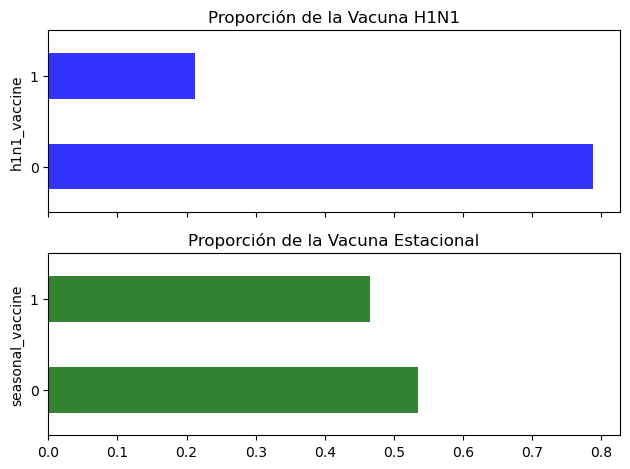

In [381]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = train_labels_df.shape[0]

(train_labels_df['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proporción de la Vacuna H1N1", ax=ax[0], color='blue', alpha=0.8)
)
ax[0].set_ylabel("h1n1_vaccine")

(train_labels_df['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proporción de la Vacuna Estacional", ax=ax[1], color='darkgreen', alpha=0.8)
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

Parece que aproximadamente la mitad de las personas recibieron la vacuna contra la gripe estacional, pero solo alrededor del 20% de las personas recibieron la vacuna contra la gripe H1N1. En términos de equilibrio de clases, decimos que el objetivo de la vacuna contra la gripe estacional tiene clases equilibradas, pero el objetivo de la vacuna contra la gripe H1N1 tiene clases moderadamente desequilibradas.

Vamos a ver si son independientes las variables objetivo, es decir, si hay alguna relación entre ellas. Para ello, primero construimos una tabla de contingencia de las dos variables objetivo.

In [383]:
pd.crosstab(
    train_labels_df["h1n1_vaccine"],
    train_labels_df["seasonal_vaccine"],
    margins=True,
    normalize=True
)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


Y ahora, calculamos el coeficiente de correlación de Pearson entre las dos variables objetivo.

In [385]:
# El coeficiente Phi es el mismo que el de Pearson para dos variables binarias
train_labels_df["h1n1_vaccine"].corr(train_labels_df["seasonal_vaccine"], method="pearson")

0.37714265306144557

Vemos que estas dos variables tienen un coeficiente phi de 0.37, lo que indica una correlación positiva moderada. Esto también se puede ver en la tabulación cruzada. La mayoría de las personas que se vacunaron contra la gripe H1N1 también se vacunaron contra la gripe estacional. Si bien una minoría de las personas que se vacunaron contra la gripe estacional se vacunaron contra la gripe H1N1, se vacunaron contra la gripe H1N1 en mayor proporción que quienes no se vacunaron contra la gripe estacional.

---
---
### **3.4. Análisis de las Características (Features)**
---
---

A continuación, echemos un vistazo a nuestras características. A partir de la página de descripción del problema, sabemos que las variables de características son casi todas categóricas: una combinación de características binarias, ordinales y nominales. Seleccionemos algunas y veamos cómo las tasas de vacunación pueden diferir en los distintos niveles de las variables de características.

Primero, combinemos nuestras características y etiquetas en un marco de datos.

In [389]:
# Unir las características de entrenamiento con las etiquetas de entrenamiento
joined_df = train_features_df.join(train_labels_df)

# Mostrar las dimensiones de los datos unidos
print(f'Dimensiones del conjunto de datos unidos: {joined_df.shape}')

# Mostrar las primeras filas de los datos unidos
joined_df.head()

Dimensiones del conjunto de datos unidos: (26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


A continuación, veamos cómo se correlacionan las características con las variables objetivo. Comenzaremos por intentar visualizar si existe una correlación bivariada simple. Si una característica está correlacionada con el objetivo, esperaríamos que haya diferentes patrones de vacunación a medida que varíen los valores de la característica.

Es difícil llegar directamente a la visualización final correcta. En lugar de eso, podemos elegir una característica y un objetivo y avanzar hasta un prototipo, antes de aplicarlo a más características y a ambos objetivos. Usaremos `h1n1_concern`, el nivel de preocupación que mostró la persona sobre la gripe H1N1, y `h1n1_vaccinecomo` variable objetivo.

Primero, obtendremos el recuento de observaciones para cada combinación de esas dos variables.

In [391]:
counts = (
    joined_df[['h1n1_concern', 'h1n1_vaccine']]
    .groupby(['h1n1_concern', 'h1n1_vaccine'])
    .size()
    .unstack('h1n1_vaccine')
)

counts

h1n1_vaccine,0,1
h1n1_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341


Es difícil calcular a simple vista estos números en bruto y ver patrones con claridad. Pongamos esto en un gráfico de barras. Compararemos cómo cambian los tamaños de los grupos a medida que varían.

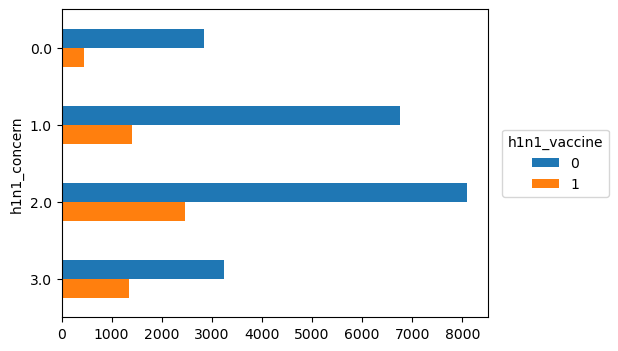

In [393]:
ax = counts.plot.barh(figsize=(5.5, 4))
ax.invert_yaxis()
ax.legend(
    loc='center right',
    bbox_to_anchor=(1.3, 0.5),
    title='h1n1_vaccine'
)

Lamentablemente, todavía es difícil determinar si los niveles de `h1n1_concern` muestran diferencias en la probabilidad de que una persona se vacune. Dado que las dos clases están desequilibradas, simplemente vemos menos observaciones de personas vacunadas para cada nivel de `h1n1_concern`. Esto eclipsa cualquier otra tendencia que pudiera existir.

Veamos en cambio la tasa de vacunación para cada nivel de `h1n1_concern`.

In [395]:
h1n1_concern_counts = counts.sum(axis='columns')
h1n1_concern_counts

h1n1_concern
0.0     3296
1.0     8153
2.0    10575
3.0     4591
dtype: int64

In [396]:
props = counts.div(h1n1_concern_counts, axis='index')
props

h1n1_vaccine,0,1
h1n1_concern,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


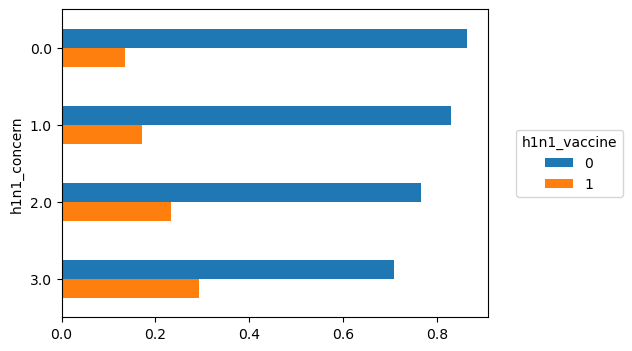

In [397]:
ax = props.plot.barh(figsize=(5.5, 4))
ax.invert_yaxis()
ax.legend(
    loc='center left',
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

Ahora tenemos una imagen más clara de lo que está sucediendo. En este gráfico, cada par de barras azules (sin vacuna) y naranjas (vacuna recibida) suman 1.0. Podemos ver claramente que, aunque la mayoría de las personas no se vacunan contra la gripe H1N1, es más probable que lo hagan si tienen un mayor nivel de preocupación. Parece que `h1n1_concern` será una característica útil cuando lleguemos a la modelización.

Dado que cada par de barras suma 1.0 y solo tenemos dos barras, este es en realidad un buen caso de uso para un gráfico de barras apiladas, para que sea aún más fácil de leer.

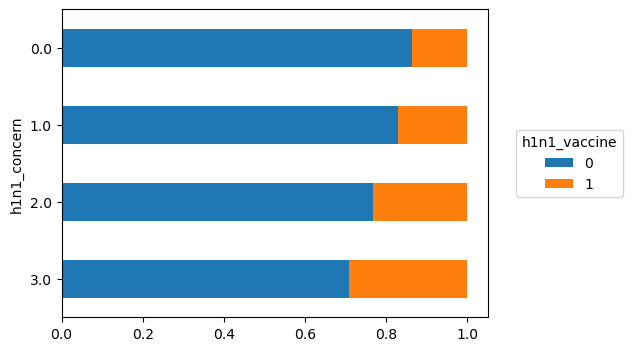

In [399]:
ax = props.plot.barh(figsize=(5.5, 4), stacked=True)
ax.invert_yaxis()
ax.legend(
    loc='center left',
    bbox_to_anchor=(1.05, 0.5),
    title='h1n1_vaccine'
)

Así, tenemos un gráfico de barras apiladas que muestra la tasa de vacunación para cada nivel de `h1n1_concern`. A medida que aumenta el nivel de preocupación, también lo hace la tasa de vacunación.

---
#### **3.4.1. Analizando más variables**
---

Factoricemos este código en una función para que podamos usarlo en más variables.

In [403]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against
    `col`.

    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes
            object to attach plot to
    """
    counts = (joined_df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

Luego, recorreremos varias columnas y graficaremos tanto `h1n1_vaccine` como `seasonal_vaccine`.

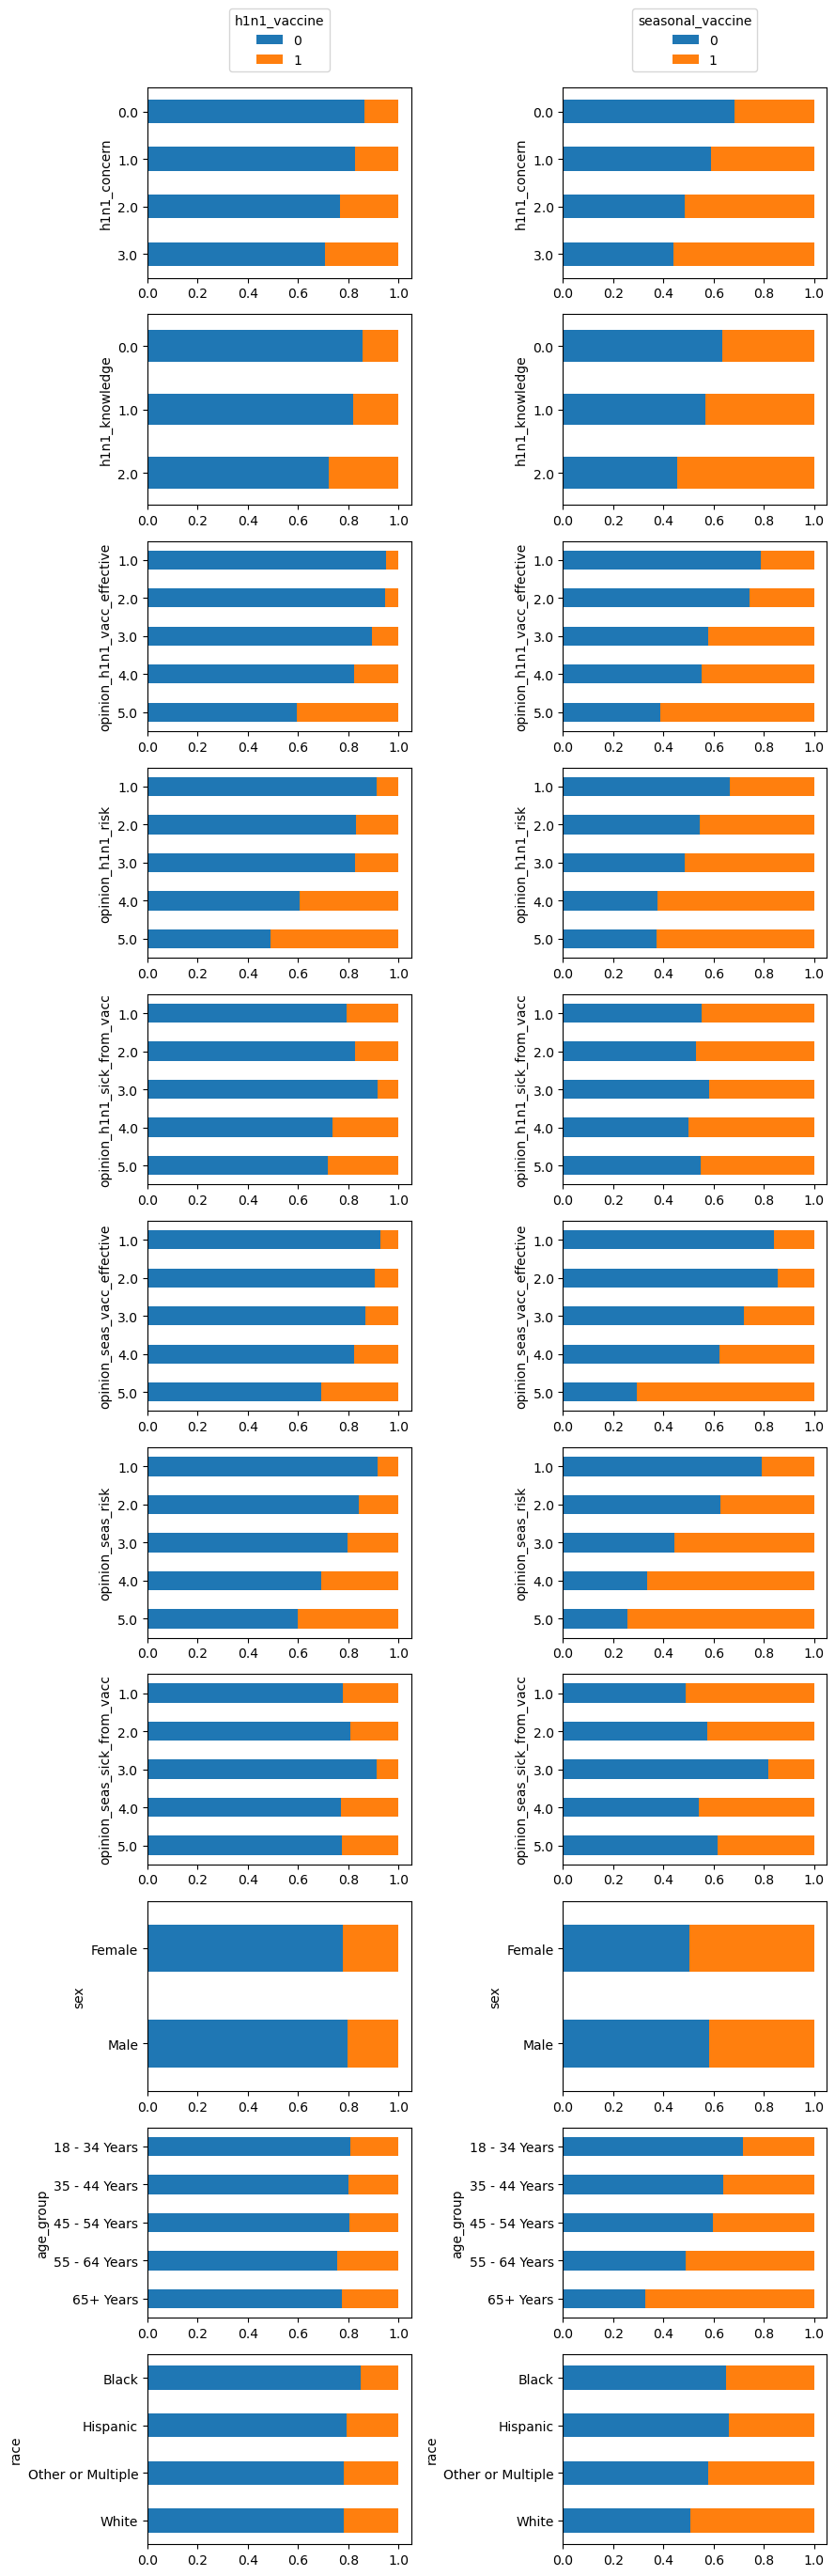

In [405]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(9, len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', joined_df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', joined_df, ax=ax[idx, 1]
    )

ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

Parece que las preguntas sobre conocimiento y opinión tienen una señal bastante fuerte para ambas variables objetivo.

Las características demográficas tienen una correlación más fuerte con `seasonal_vaccine`, pero mucho menos hasta ahora `h1n1_vaccine`. En particular, vemos de manera interesante una fuerte correlación con `age_groupel`, `seasonal_vaccinepero` no con `h1n1_vaccine`. Parece que con la gripe estacional, las personas actúan apropiadamente de acuerdo con el hecho de que las personas más afectadas y tienen mayor riesgo de complicaciones relacionadas con la gripe con la edad . Sin embargo, resulta que la gripe H1N1 tiene una relación interesante con la edad: aunque las personas mayores tienen un mayor riesgo de complicaciones, tenían menos probabilidades de infectarse. Si bien sabemos algo sobre la causalidad a partir de este análisis, parece que los factores de riesgo terminaron reflejándose en las tasas de vacunación.

$\ $

$\ $

$\ $

---
#### **3.4.2. Detección de Outliers**
---


Una cuestión a tener en cuenta, sobre todo en los datos recogidos de las encuestas por muestreo no automatizado, son los factores relacionados con el error humano y, más concretamente, con el error de anotación. En sistemas donde no está controlado el rango de respuestas para cada pregunta pueden producirse confusiones o errores a la hora de tabular los datos, dado que no tenemos información acerca de estos procesos será mejor analizar mediante diagramas de cajas (boxplots) si todos los datos pertenecen a un mismo rango de valores. Aclarar que las variables que se van a analizar aquí son las numéricas, posteriormente analizaremos los resultados para el resto de variables:

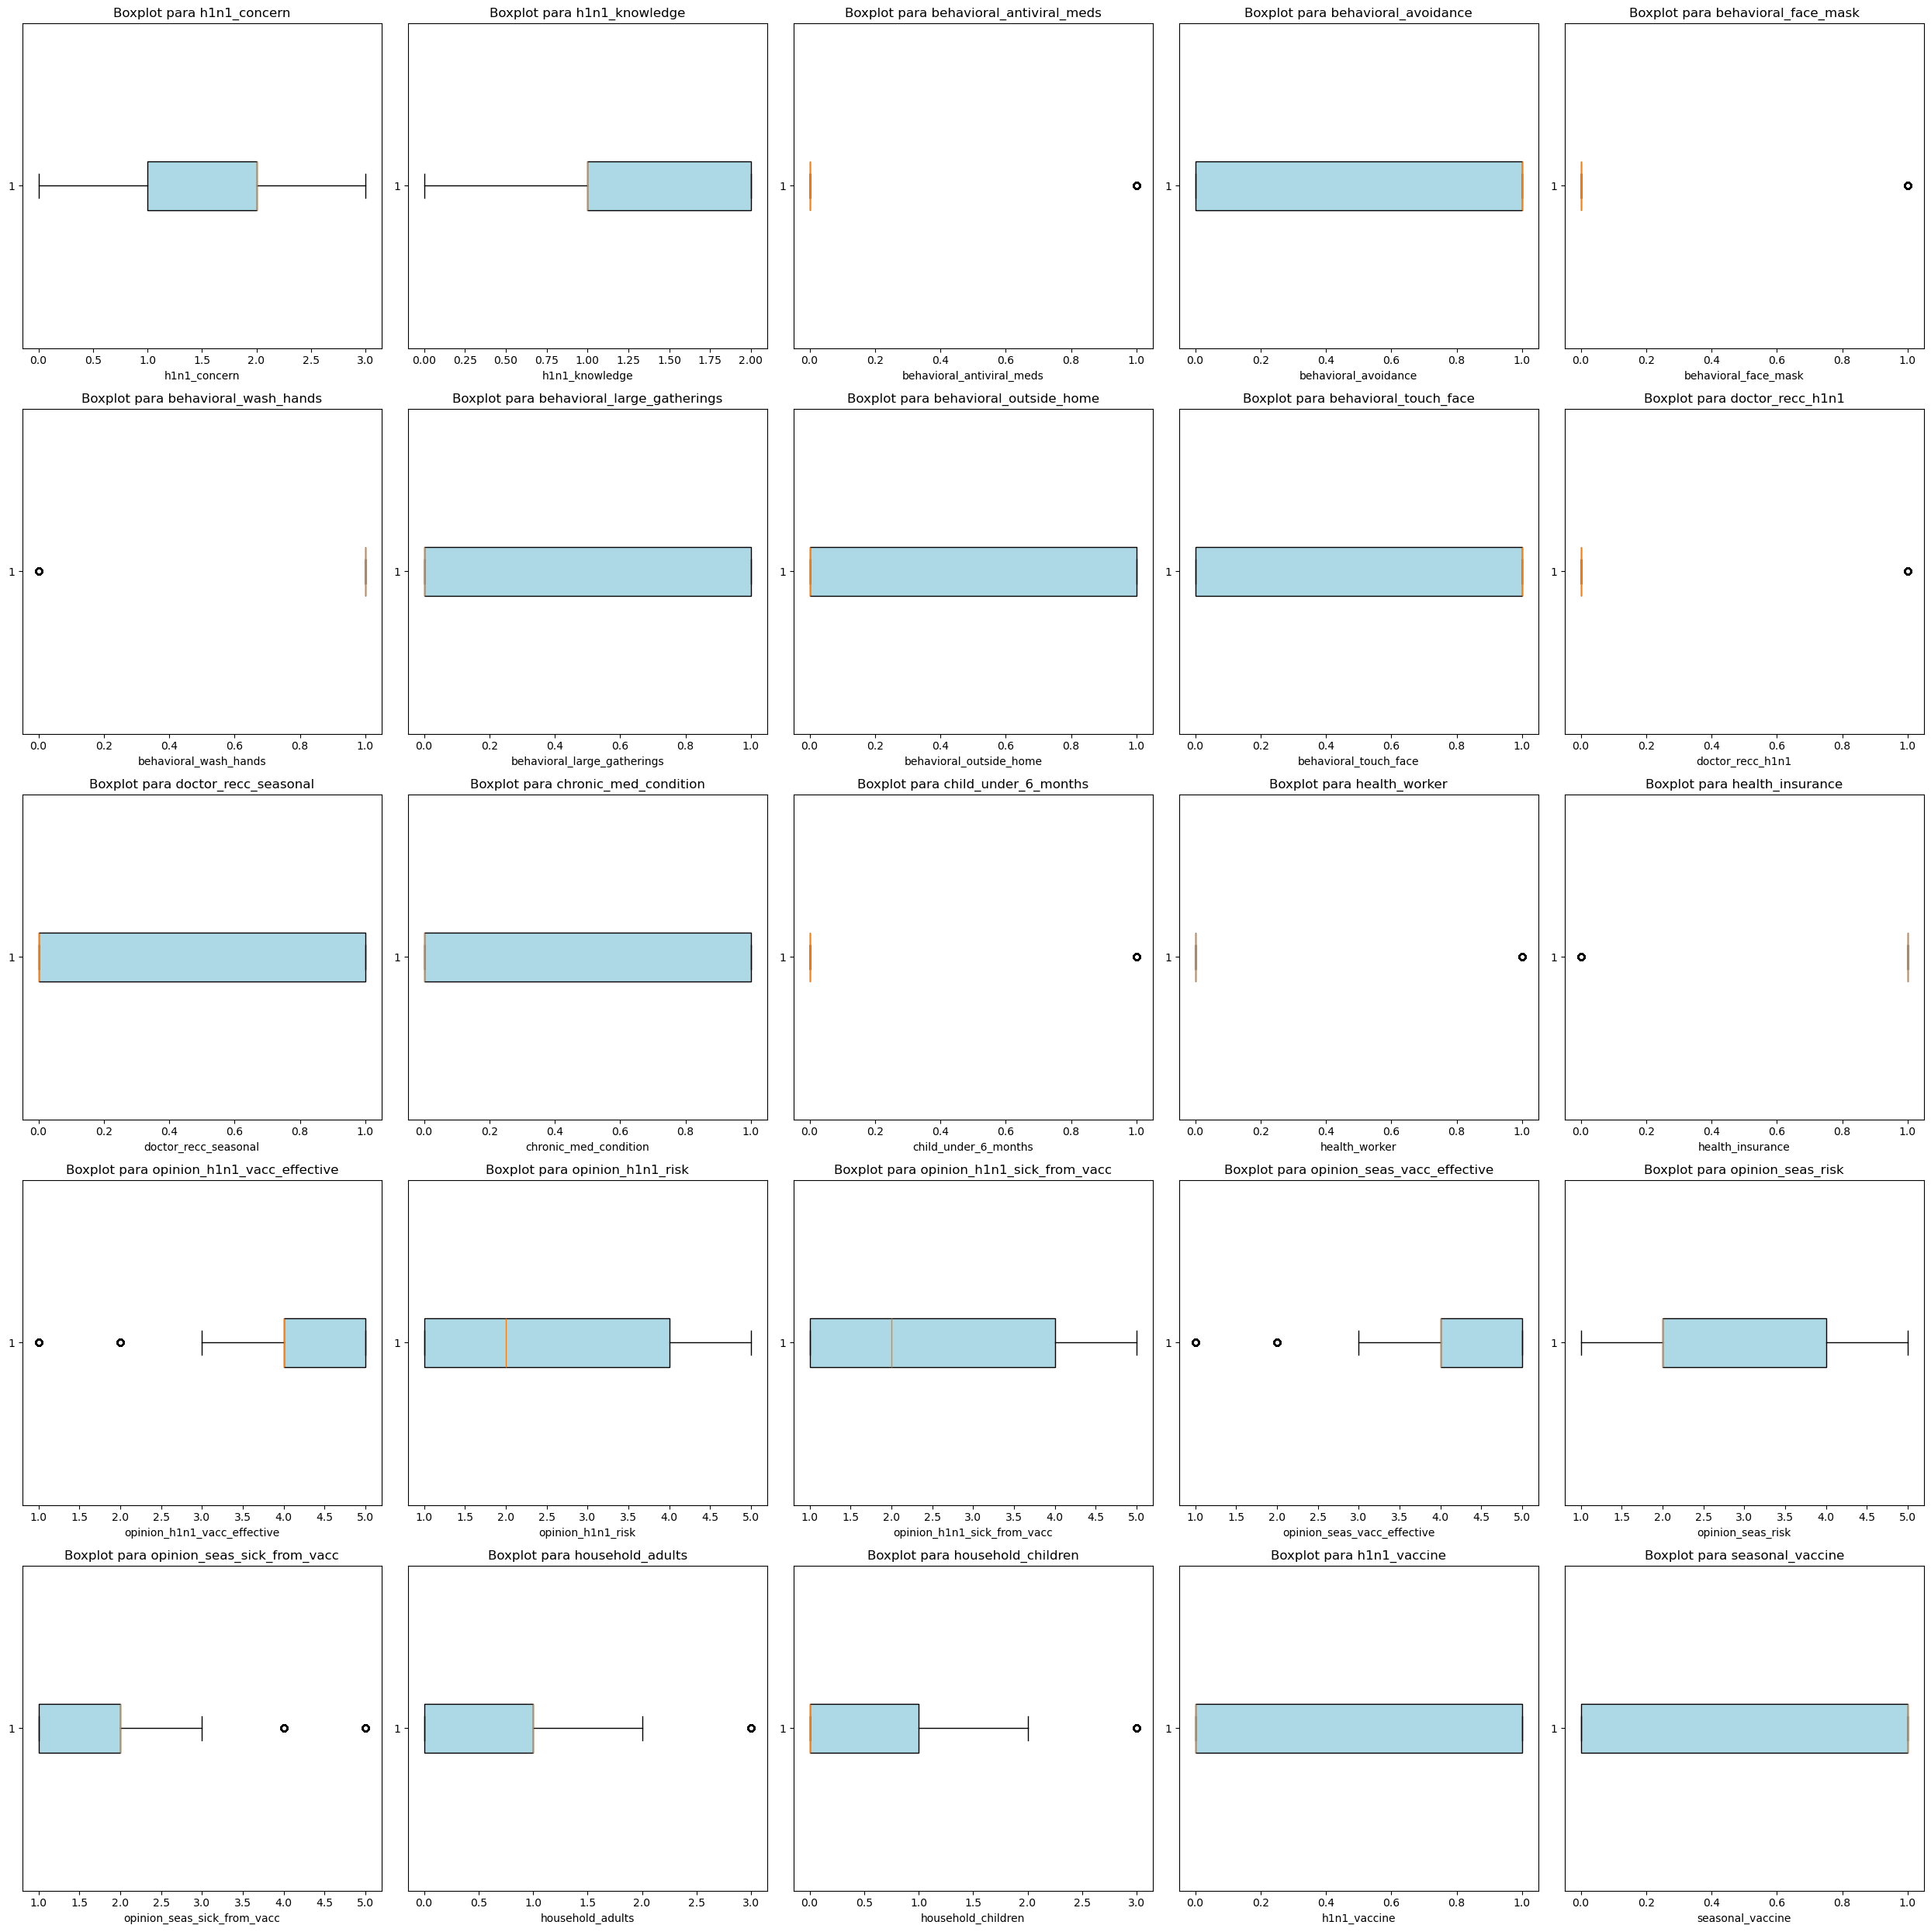

In [407]:
# Seleccionar las columnas numéricas del DataFrame
numerical_cols = joined_df.select_dtypes(include=['float64', 'int64']).columns

# Crear un DataFrame sin valores nulos para las columnas numéricas
joined_df_numeric = joined_df[numerical_cols].dropna()

# Definir la cantidad de columnas por fila
plots_per_row = 5  # Cambia a 3 si quieres 3 gráficos por fila
total_plots = len(numerical_cols)
rows = math.ceil(total_plots / plots_per_row)

# Crear los gráficos
plt.figure(figsize=(plots_per_row * 5, rows * 5))  # Ajustar tamaño de la figura
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, plots_per_row, i)
    plt.boxplot(joined_df_numeric[col], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    plt.title(f'Boxplot para {col}')
    plt.xlabel(col)

# Ajustar el diseño
plt.tight_layout()
plt.show()


Como se puede apreciar, todas las variables numéricas están correctamente indexadas en el rango permitido para las variables, por lo que no podemos determinar que haya valores anómalos en este dataset, aunque hay varias categorías con valores poco frecuentes (`behavioral_antiviral_meds`,`behavioral_face_mask`,`doctor_recc_h1n1`, etc.).

Analizamos a continuación la distribución de valores para el resto de variables, de esta manera podremos obtener conclusiones acerca de los posibles valores anómalos (que tengan frecuencia nula, prácticamente):

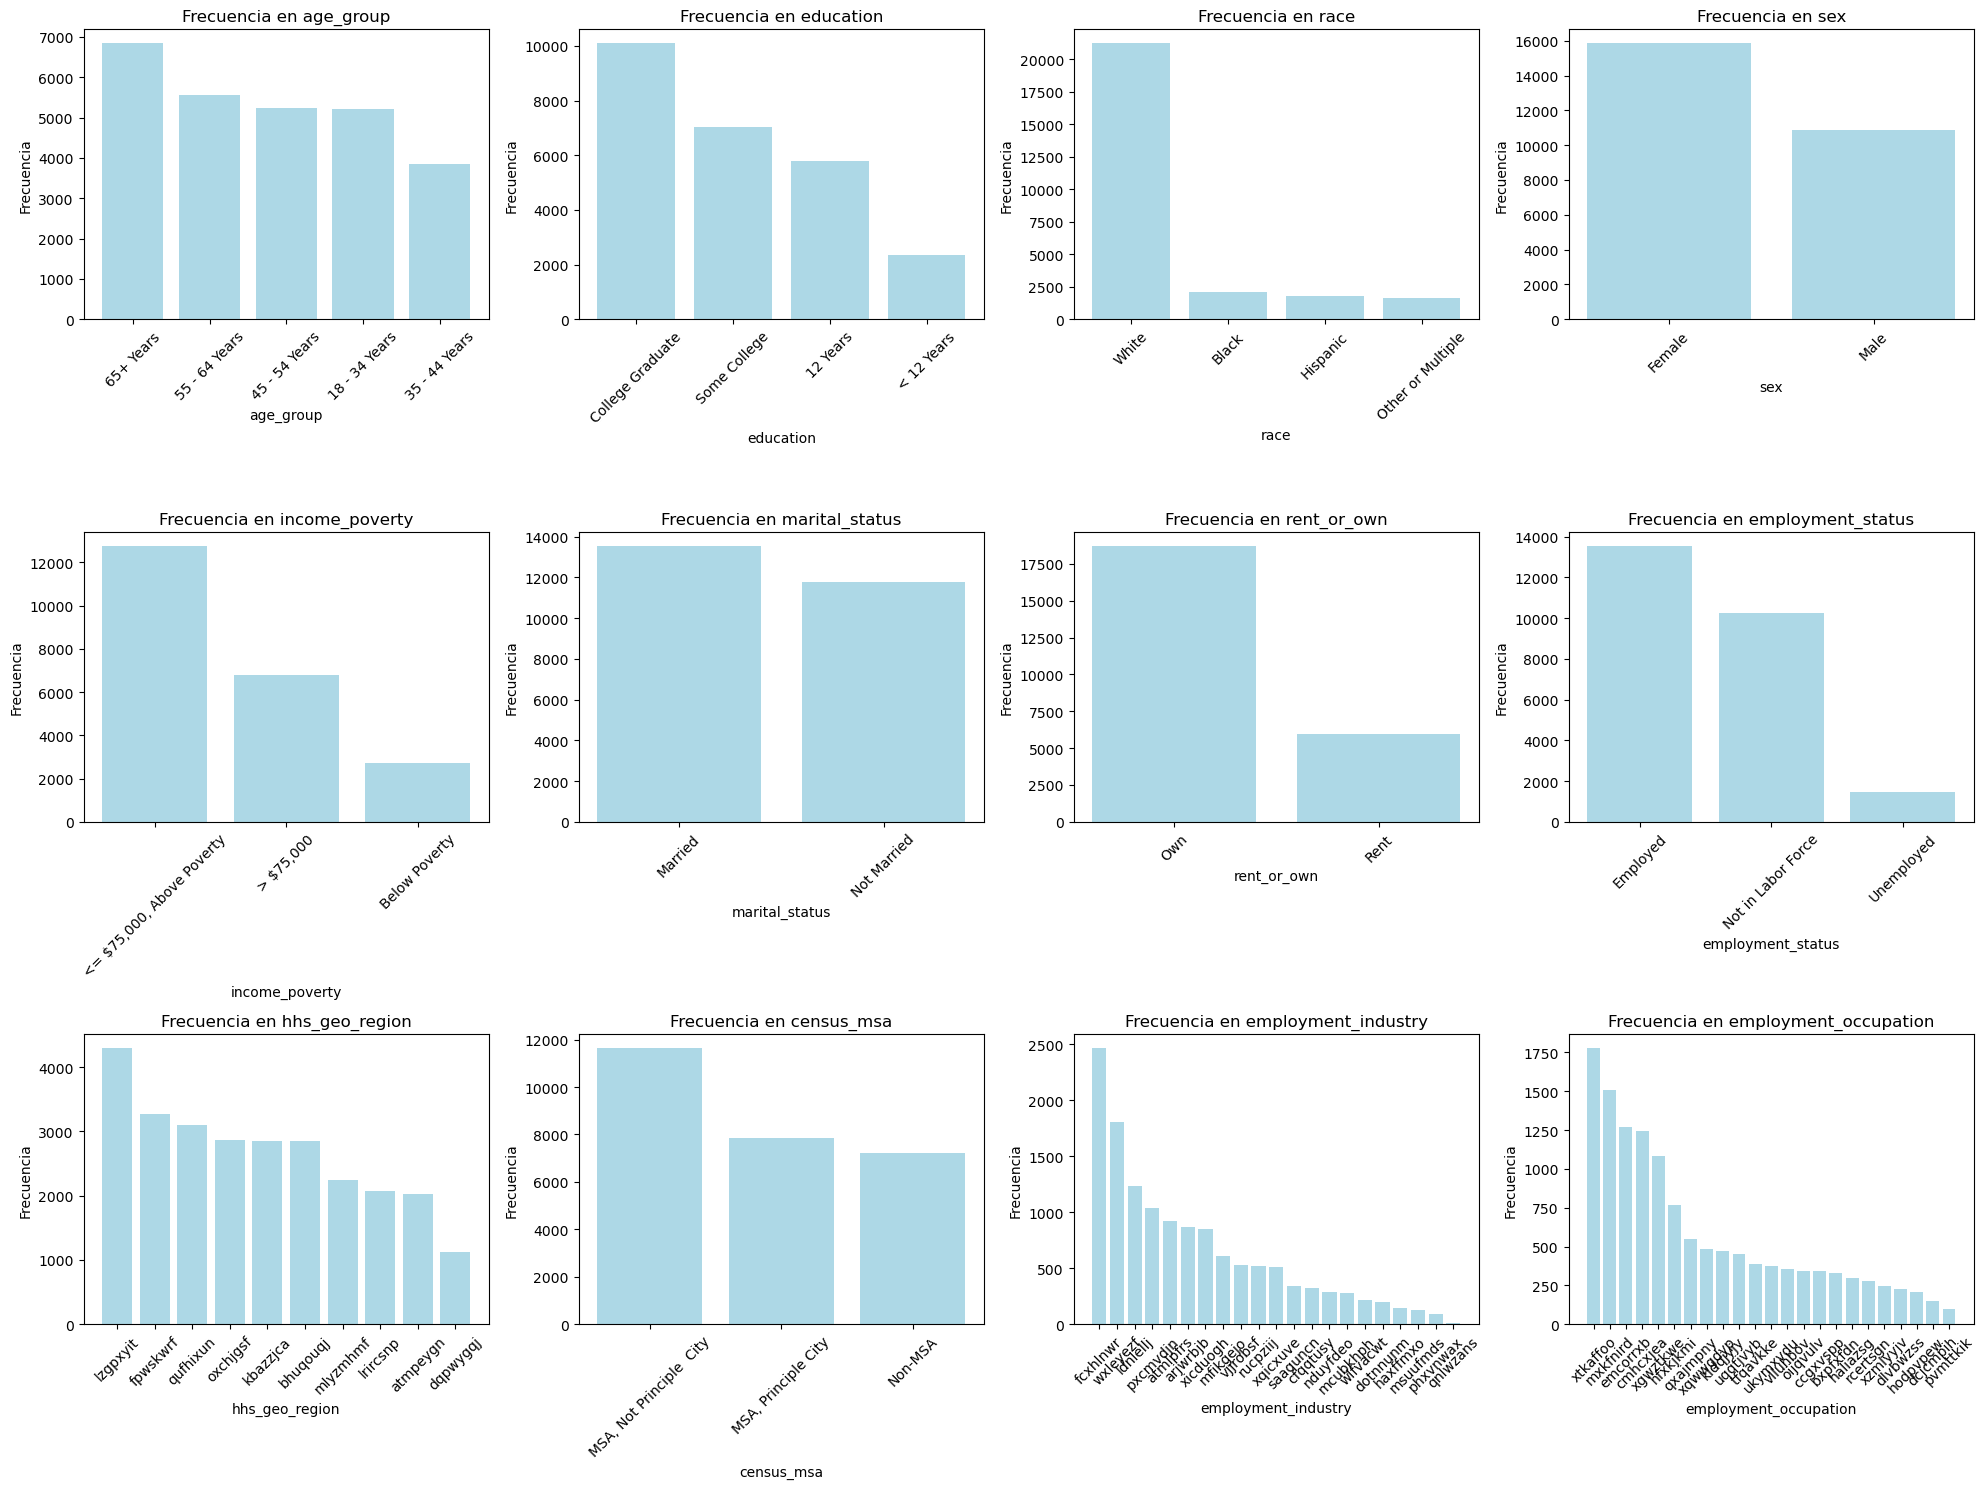

In [409]:
# Seleccionar las columnas no numéricas
non_numerical_cols = joined_df.select_dtypes(exclude=['float64', 'int64']).columns

# Definir la cantidad de gráficos por fila
plots_per_row = 4  # Cambia a 3 si prefieres 3 gráficos por fila
total_plots = len(non_numerical_cols)
rows = math.ceil(total_plots / plots_per_row)

# Crear los gráficos
fig, axes = plt.subplots(rows, plots_per_row, figsize=(plots_per_row * 5, rows * 5), squeeze=False)

for idx, col in enumerate(non_numerical_cols):
    value_counts = joined_df[col].value_counts()  # Frecuencia de valores únicos
    row, col_pos = divmod(idx, plots_per_row)  # Calcular posición de la celda en la cuadrícula
    
    axes[row, col_pos].bar(value_counts.index, value_counts.values, color='lightblue')
    axes[row, col_pos].set_title(f"Frecuencia en {col}")
    axes[row, col_pos].set_xlabel(col)
    axes[row, col_pos].set_ylabel("Frecuencia")
    axes[row, col_pos].tick_params(axis='x', rotation=45)  # Rotar etiquetas si son largas

# Ocultar los subplots vacíos (si hay)
for idx in range(total_plots, rows * plots_per_row):
    fig.delaxes(axes.flatten()[idx])

# Ajustar diseño
plt.tight_layout()
plt.show()

Aunque en primera instancia no se aprecian valores anómalos para estas variables, vamos a estudiar en profundidad algunos registros más interesantes, ya que no parecen tener datos algunos en las variables `employment_industry` y `employment_occupation`, aunque no se esperan resultados extraños, simplemente podrían pertenecer a un grupo de profesiones e industrias poco numerosas:

In [411]:
# Filtrar filas según las condiciones
filtered_df = joined_df.loc[
    (joined_df['employment_industry']== 'qnlwzans') | 
    (joined_df['employment_occupation'] == 'pvmttkik')
]

filtered_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
139,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Not Principle City",1.0,3.0,nduyfdeo,pvmttkik,0,0
177,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",0.0,0.0,nduyfdeo,pvmttkik,0,1
473,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,Own,Employed,atmpeygn,"MSA, Not Principle City",1.0,1.0,nduyfdeo,pvmttkik,0,1
537,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,Own,Employed,lzgpxyit,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik,1,1
757,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Own,Employed,lzgpxyit,"MSA, Principle City",1.0,1.0,qnlwzans,xtkaffoo,1,1


Como se podía preveer, estos registros no parecen presentar datos 'raros' más allá de que sus profesiones/industrias sean menos comunes. Por lo que nuestros datos no necesitan ser modificados en este aspecto

$\ $

$\ $

$\ $

---
#### **3.4.3. Valores Perdidos**
---
En esta sección se va a realizar un análisis preliminar para comprender mejor porque aparecen valores nulos en ciertas columnas y qué nos debería preocupar de ellos. Al principio ya se analizó brevemente la base de datos, y se concluyó que en la mayoría de variables hay valores nulos presentes, estos pueden deberse a la aleatoriedad o a otro tipo de cuestiones que se abordarán de manera previa a la codificación. En esta seccion nos vamos a dedicar al análisis de las variables que mayor proporción de valores nulos presentan, `health_insurance`  `employment_industry` y `employment_occupation`. 

Para analizar los valores perdidos para estas tres variables es posible proceder estudiándolos individualmente o realizando un análisis multivariante. Las ventajas de analizar varias variables simultáneamente es que se pueden extraer conclusiones e información previa de los datos. 

Vamos a mostrar un conteo básico de valores perdidos en estas variables y, a continuación, las estudiaremos conjuntamente para determinar relaciones subyacentes:

In [413]:
nan_count = joined_df['health_insurance'].isna().sum()
no_nan_count = joined_df['health_insurance'].notna().sum()
print(f"Health Insurance. NaN: {nan_count}, No NaN: {no_nan_count}")
nan_count = joined_df['employment_industry'].isna().sum()
no_nan_count = joined_df['employment_industry'].notna().sum()
print(f"Employment Industry. NaN: {nan_count}, No NaN: {no_nan_count}")
nan_count = joined_df['employment_occupation'].isna().sum()
no_nan_count = joined_df['employment_occupation'].notna().sum()
print(f"Employment Occupation. NaN: {nan_count}, No NaN: {no_nan_count}")

Health Insurance. NaN: 12274, No NaN: 14433
Employment Industry. NaN: 13330, No NaN: 13377
Employment Occupation. NaN: 13470, No NaN: 13237


Estudiamos las correlaciones en los valores perdidos de las tres variables:


##### Valores perdidos entre Health Insurance y Employment Occupation

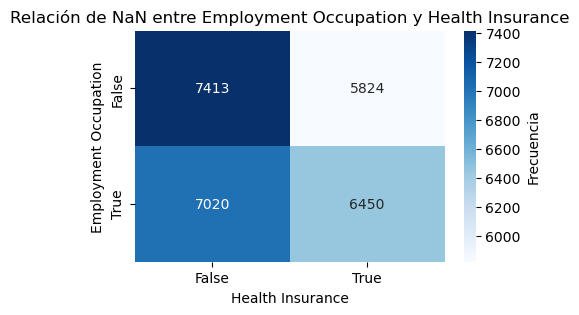

In [415]:
# Tabla de contingencia para employment_ y health_insurance (incluyendo NaN)
health_insurance_crosstab = pd.crosstab(
    joined_df['employment_occupation'].isna(), 
    joined_df['health_insurance'].isna(), 
    margins=True, 
    dropna=False
)

plt.figure(figsize=(5, 3))
sns.heatmap(
    health_insurance_crosstab.iloc[:-1, :-1],  # Excluir la fila y columna de totales
    annot=True, 
    fmt="d", 
    cmap="Blues",
    cbar_kws={'label': 'Frecuencia'}
)
plt.title("Relación de NaN entre Employment Occupation y Health Insurance")
plt.xlabel("Health Insurance")
plt.ylabel("Employment Occupation")
plt.show()

Podemos observar que no todos los registros que contienen valores perdidos en `Health Insurance` tienen influencia directa sobre la presencia de valores nulos en la ocupación laboral, ni viceversa. La presencia de valores perdidos en estas variables parece no tener una correlación obvia, por lo que podemos pasar a comparar el seguro sanitario con la industria de trabajo:


##### Valores perdidos entre Health Insurance y Employment Industry

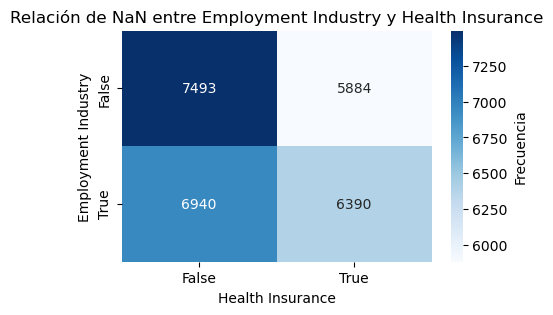

In [417]:
# Tabla de contingencia para employment_industry y health_insurance (incluyendo NaN)
health_insurance_crosstab = pd.crosstab(
    joined_df['employment_industry'].isna(), 
    joined_df['health_insurance'].isna(), 
    margins=True, 
    dropna=False
)

plt.figure(figsize=(5, 3))
sns.heatmap(
    health_insurance_crosstab.iloc[:-1, :-1],  # Excluir la fila y columna de totales
    annot=True, 
    fmt="d", 
    cmap="Blues",
    cbar_kws={'label': 'Frecuencia'}
)
plt.title("Relación de NaN entre Employment Industry y Health Insurance")
plt.xlabel("Health Insurance")
plt.ylabel("Employment Industry")
plt.show()

Los resultados se asemejan con los anteriores, por lo que no podemos extraer conclusiones acerca de la relación en la presencia de valores perdidos entre `Health Insurance` y el resto de columnas que mayor proporción de NA presenta. Pasamos a analizar las correlaciones de valores nuelos entre las otras variables:

##### Valores perdidos entre Employment Industry y Employment Occupation

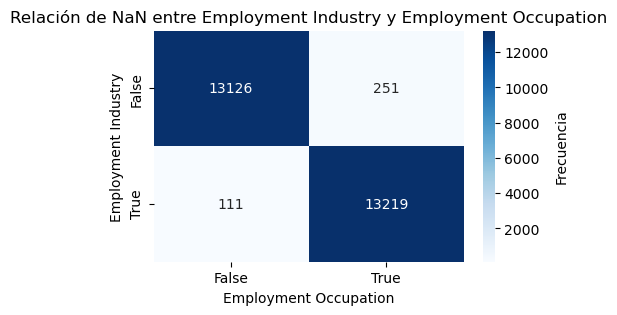

In [419]:
# Tabla de contingencia para employment_industry y employment_occupation (incluyendo NaN)
health_insurance_crosstab = pd.crosstab(
    joined_df['employment_industry'].isna(), 
    joined_df['employment_occupation'].isna(), 
    margins=True, 
    dropna=False
)

plt.figure(figsize=(5, 3))
sns.heatmap(
    health_insurance_crosstab.iloc[:-1, :-1],  # Excluir la fila y columna de totales
    annot=True, 
    fmt="d", 
    cmap="Blues",
    cbar_kws={'label': 'Frecuencia'}
)
plt.title("Relación de NaN entre Employment Industry y Employment Occupation")
plt.xlabel("Employment Occupation")
plt.ylabel("Employment Industry")
plt.show()

En este caso sí que se aprecia una clara relación entre los registros que no respondieron las categorías de `employment_industry` y `employment_occupation`. Una posible hipótesis es pensar que estas variables pueden estar fuertemente correlacionadas cuando los individuos encuestados presentan situaciones de desempleo (Unemployed o Not in Labor Force), para determinar el número de individuos que cumple las tres condiciones aplicamos un filtro:

In [421]:
filtered_rows = joined_df[
    joined_df['employment_status'].isin(['Unemployed', 'Not in Labor Force']) & 
    joined_df['employment_industry'].isna() &
    joined_df['employment_occupation'].isna()
]
print(f"Filas con valores perdidos debido al Employment Status: {filtered_rows.shape[0]}")
print(filtered_rows.head)

Filas con valores perdidos debido al Employment Status: 11684
<bound method NDFrame.head of                h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
0                       1.0             0.0                        0.0   
3                       1.0             1.0                        0.0   
9                       2.0             1.0                        0.0   
12                      1.0             1.0                        0.0   
14                      3.0             1.0                        0.0   
...                     ...             ...                        ...   
26697                   1.0             1.0                        0.0   
26700                   3.0             1.0                        0.0   
26701                   2.0             2.0                        0.0   
26702                   2.0             0.0                        0.0   
26706               

También vamos a comprobar como se distribuyen los valores perdidos de las variables `Employment Industry` y `Employment Occupation` en función de las categorías en `Employment `

In [423]:
# Crear una copia del DataFrame e incluir los valores nulos en 'employment_status' como 'NA'
joined_df_with_na = joined_df.copy()
joined_df_with_na['employment_status'] = joined_df_with_na['employment_status'].fillna('NA')

# Contar los valores nulos y para cada categoría de 'employment_status'
null_counts = joined_df_with_na.groupby('employment_status')[['employment_industry', 'employment_occupation']].apply(
    lambda group: group.isnull().sum()
)


# Contar valores totales para cada categoría de 'employment_status'
total_counts = joined_df_with_na.groupby('employment_status').size()

# Mostrar los resultados
print("Conteo de valores nulos:")
print(null_counts)

print("\nConteo de valores totales para cada categoría de 'employment_status':")
print(total_counts)

Conteo de valores nulos:
                    employment_industry  employment_occupation
employment_status                                             
Employed                            183                    323
NA                                 1463                   1463
Not in Labor Force                10231                  10231
Unemployed                         1453                   1453

Conteo de valores totales para cada categoría de 'employment_status':
employment_status
Employed              13560
NA                     1463
Not in Labor Force    10231
Unemployed             1453
dtype: int64


Se puede apreciar que TODOS los registros faltantes de la variable `employment_status` presentan estos valores perdidos en las variables `Employment Occupation` y `Employment Industry` también. Este mismo hecho ocurre en los casos de que el invididuo esté desempleado o sin trabajo (Unemployed o Not in Labor Force), por lo que parece coherente que los casos de valores perdidos para `employment_status` sean tratados como cualquiera de estos dos grupos a la hora de imputar valores perdidos. 

En el gráfico de correlación ya se ha visto que hay muy pocos registros (entre 100 y 300) que presentan valores perdidos para `Employment Industry` o `Employment Occupation`, pero no para las dos. 

Una conclusión factible es pensar que los encuestados sin empleo y, puede que en muchas ocasiones en situación de pobreza tampoco hayan querido responder a cierto tipo de cuestiones. Vamos a ver, a continuación, la influencia que tiene la presencia de valores Nulos (No aplicables) sobre otras variables aplicando las dos condiciones:

In [426]:
# Condiciones para los dos grupos
condition1 = (
    joined_df['employment_status'].isin(['Unemployed', 'Not in Labor Force']) & 
    joined_df['employment_industry'].isna() & 
    joined_df['employment_occupation'].isna()
)

condition2 = (
    joined_df_cleaned['employment_status'].isna() & 
    joined_df_cleaned['employment_industry'].isna() & 
    joined_df_cleaned['employment_occupation'].isna()
)

# Subgrupo combinado
combined_group = joined_df[condition1 | condition2]

Ahora podemos calcular la proporción de valores nulos en cada variable con y sin la condición de que no sean aplicables:

In [428]:
# Excluir las columnas 'employment_industry' y 'employment_occupation'
columns_to_exclude = ['employment_industry', 'employment_occupation','employment_status']

# Total de valores nulos por variable
total_nulls = joined_df.drop(columns=columns_to_exclude).isna().sum()

# Valores nulos en el subgrupo combinado y resto
combined_nulls = combined_group.drop(columns=columns_to_exclude).isna().sum()
rest_nulls = rest_of_data.drop(columns=columns_to_exclude).isna().sum()

# Porcentaje de nulos relativos al total
combined_nulls_pct = (combined_nulls / total_nulls) * 100
rest_nulls_pct = (rest_nulls / total_nulls) * 100

# Crear DataFrame de comparación
influence_df = pd.DataFrame({
    'Variable': total_nulls.index,
    'Nulls in Combined (%)': combined_nulls_pct.values,
    'Nulls in Rest (%)': rest_nulls_pct.values
}).sort_values(by='Nulls in Combined (%)', ascending=False)

# Mostrar resultados
print(influence_df)



                       Variable  Nulls in Combined (%)  Nulls in Rest (%)
12         child_under_6_months              99.756098           0.243902
13                health_worker              99.004975           0.995025
17  opinion_h1n1_sick_from_vacc              98.734177           1.265823
20  opinion_seas_sick_from_vacc              98.696462           1.303538
19            opinion_seas_risk              98.249027           1.750973
30             household_adults              97.188755           2.811245
31           household_children              97.188755           2.811245
16            opinion_h1n1_risk              96.134021           3.865979
18  opinion_seas_vacc_effective              96.103896           3.896104
22                    education              95.593461           4.406539
26               marital_status              93.821023           6.178977
15  opinion_h1n1_vacc_effective              89.002558          10.997442
11        chronic_med_condition       

También podemos visualizar el porcentaje de valores perdidos con y sin las condiciones mediante un gráfico de barras

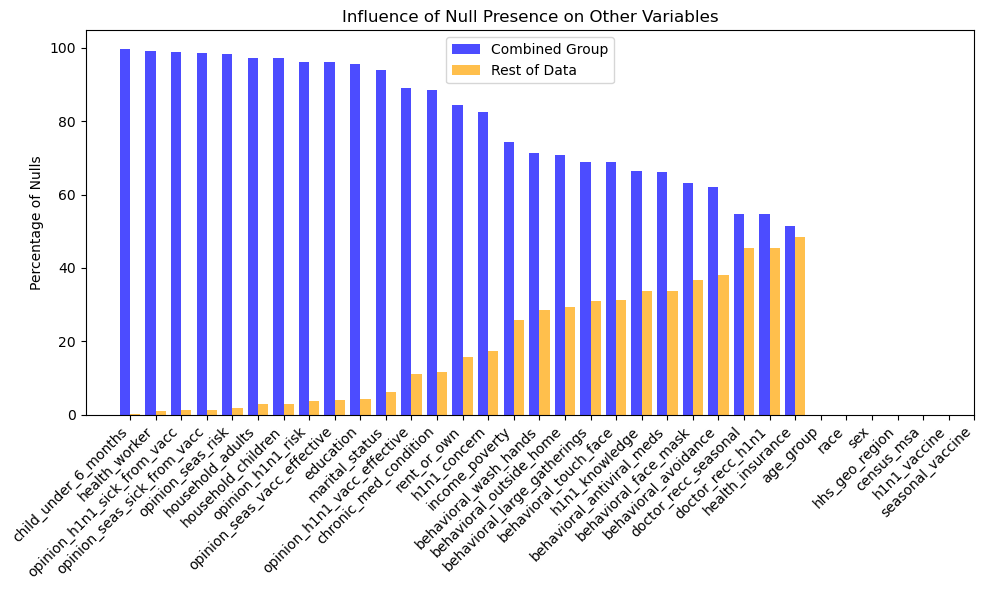

In [430]:
import matplotlib.pyplot as plt

# Visualizar las diferencias
plt.figure(figsize=(10, 6))
x = range(len(influence_df))
plt.bar(x, influence_df['Nulls in Combined (%)'], width=0.4, label='Combined Group', color='blue', alpha=0.7)
plt.bar([i + 0.4 for i in x], influence_df['Nulls in Rest (%)'], width=0.4, label='Rest of Data', color='orange', alpha=0.7)

# Personalizar gráfico
plt.xticks([i + 0.2 for i in x], influence_df['Variable'], rotation=45, ha='right')
plt.ylabel('Percentage of Nulls')
plt.title('Influence of Null Presence on Other Variables')
plt.legend()
plt.tight_layout()
plt.show()


Podemos apreciar un desbalanceo general en bastantes variables, indicando una clara influencia de la no respuesta en las condiciones y sin ellas, excepto en las variables `Health Insurance`, `doc_recc_seasonal` y `doc_rec_h1n1`. Este hecho nos hace pensar que quizás la variable de seguro médico produce demasiado ruido en nuestros datos, y no precisamente producido por una condición de desempleo laboral. Se vuelve a mostrar una cierta reticencia a contestar preguntas más sensibles para personas que pasan por situaciones complicadas. Quizás podemos pensar que muchos de los individuos encuestados en desempleo pueden petenecer a un sector social o a un entorno que les haga reticentes a la vacunación en niños menores de 6 meses, personas a cargo de mayores o niños o la propia educación que pueden recibir al respecto del efecto de la misma.


Otra forma de realizar el análisis de valores nulos es estudiar la correlación para las variables que los presentan, de esta manera podemos visualizar si la presencia de valores perdidos está relacionada entre cualesquiera dos columnas:

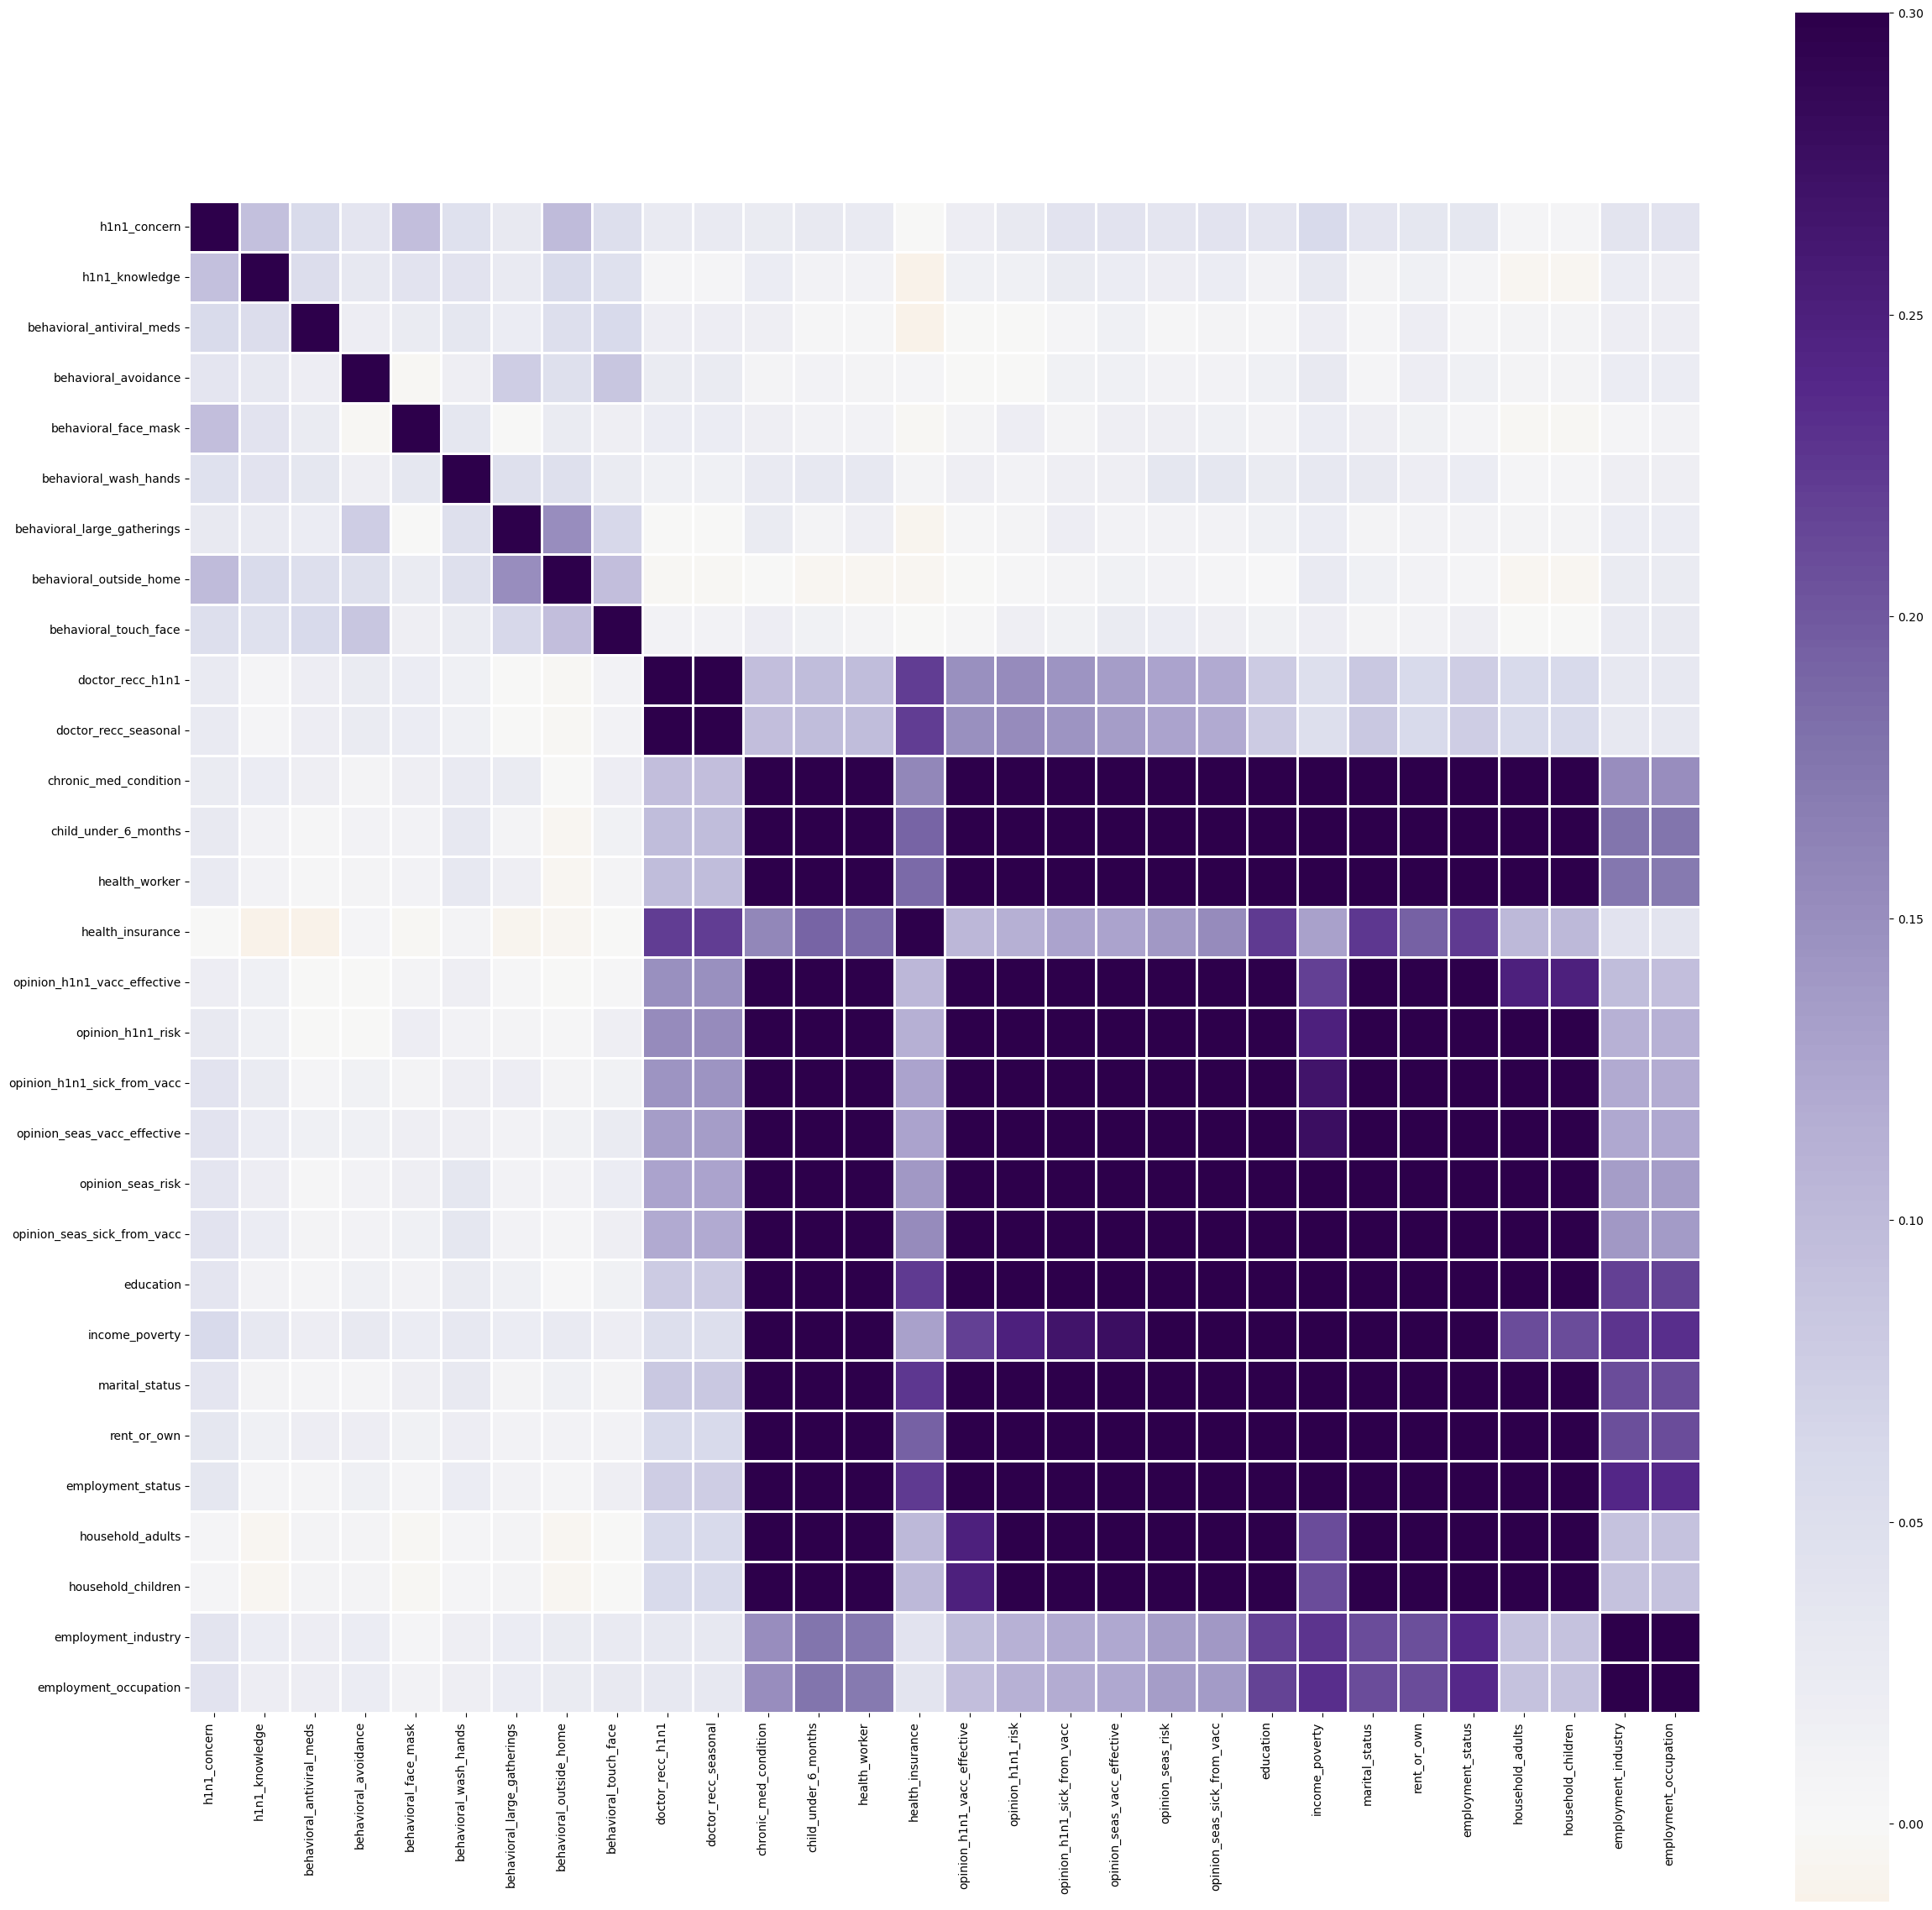

In [485]:
# Identificar las columnas con valores nulos
columns_with_nulls = joined_df.columns[joined_df.isna().any()]

# Crear una matriz de correlación solo para columnas con valores nulos
missing_corr = joined_df[columns_with_nulls].isna().corr()

# Crear el heatmap de correlación
plt.figure(figsize=(25, 25))  # Tamaño adecuado para evitar superposición

g = sns.heatmap(missing_corr, vmax=.3, center=0, 
                square=True, linewidths=1, fmt='.2f', cmap='PuOr')

# Ajustar los márgenes de la figura
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

# Rotar las etiquetas de los ejes para mayor legibilidad
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotar etiquetas del eje X
plt.yticks(rotation=0, ha='right', fontsize=10)   # Etiquetas del eje Y

# Mostrar el gráfico
plt.show()


Ahora podemos determinar mejor como la no respuesta está distribuida. Se aprecia una alta correlación entre las diferentes variables en los bloques de `Recomendación del doctor`,`Condición` , `Opinión`, `Cuestiones Socio-económicas` y `Cuestiones demográficas y culturales`. De nuevo, se aprecia como la presencia de valores perdidos para la variable `Health Insurance`no presenta casi correlación con la presencia de valores nulos en otras variables, siendo, sin embargo, una de las que mayor proporción de registros perdidos aporta.

Para finalizar esta sección, vamos a comprobar si hay instancias que presenten ruido excesivo, pudiendo distorsionar los resultados del resto de datos cuando se codifiquen para aplicar a los modelos. 

In [434]:
# Calcular la proporción de valores nulos por fila
missing_ratio_per_row = joined_df.isna().mean(axis=1) * 100

# Añadir esta proporción como una nueva columna al DataFrame
joined_df['missing_ratio'] = missing_ratio_per_row

# Filtrar las filas con más del 40% de valores nulos
rows_with_most_missing = joined_df[joined_df['missing_ratio'] > 40]

# Mostrar la cantidad de filas que cumplen con el criterio
print(f"Total de filas con más del 40% de valores nulos: {len(rows_with_most_missing)}")

# Mostrar las primeras 8 filas con más del 40% de valores nulos
rows_with_most_missing_sorted = rows_with_most_missing.sort_values(by='missing_ratio', ascending=False)
rows_with_most_missing_sorted.head(8)


Total de filas con más del 40% de valores nulos: 419


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine,missing_ratio
respondent_id,,,,,,,,,,,,,,,,,,,,,
6040,1.0,1.0,0.0,NaN,0.0,1.0,0.0,0.0,1.0,NaN,...,NaN,lrircsnp,Non-MSA,NaN,NaN,NaN,NaN,0,0,59.459459
12629,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,...,NaN,lzgpxyit,Non-MSA,NaN,NaN,NaN,NaN,0,0,59.459459
16723,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,NaN,mlyzmhmf,"MSA, Principle City",NaN,NaN,NaN,NaN,0,0,56.756757
6614,1.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,lrircsnp,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,0,56.756757
14241,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,...,NaN,kbazzjca,Non-MSA,NaN,NaN,NaN,NaN,0,0,56.756757
7749,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,NaN,...,NaN,lzgpxyit,"MSA, Principle City",NaN,NaN,NaN,NaN,0,0,56.756757
10133,3.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,NaN,...,NaN,lzgpxyit,"MSA, Principle City",NaN,NaN,NaN,NaN,0,0,56.756757
18268,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,...,NaN,bhuqouqj,"MSA, Not Principle City",NaN,NaN,NaN,NaN,0,0,56.756757


Visualizamos los resultados para determinar si hay algunos registros cuyo porcentaje de valores perdidos sea demasiado alto, aunque ya se observa que la proporción de valores perdidos en algunos casos roza el 60% de las preguntas:

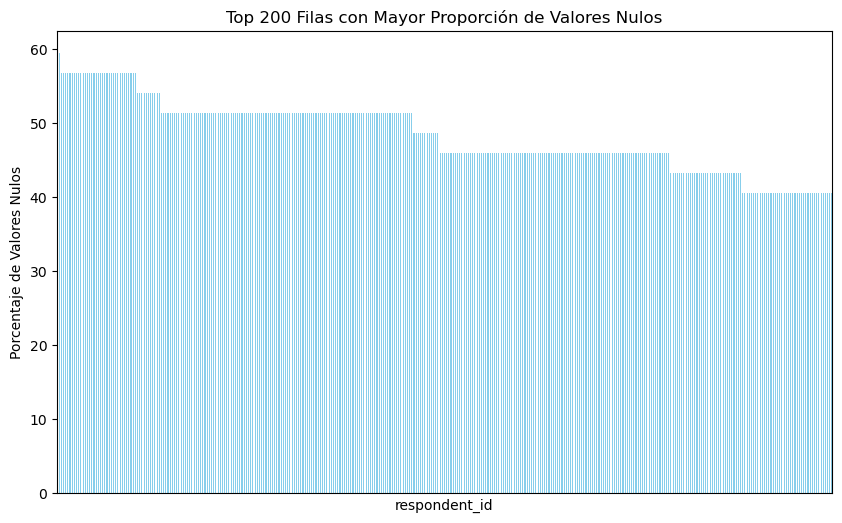

In [436]:
# Visualizar las primeras 200 filas con mayor proporción de valores nulos
plt.figure(figsize=(10, 6))
rows_with_most_missing_sorted['missing_ratio'].plot(kind='bar', color='skyblue')

# Ajustar el gráfico
plt.title('Top 200 Filas con Mayor Proporción de Valores Nulos')
plt.ylabel('Porcentaje de Valores Nulos')
plt.xticks([])
plt.show()

Podemos observar una alta tasa de no respuesta en esta encuesta, tal y como se había determinado anteriormente, hay un pequeño grupo de individuos con una proporción de preguntas no respondidas es superior al resto. También se pueden apreciar ciertos patrones en las tasas de no respuesta de los individuos.

En cualquier caso, la decisión que haya que tomar para hacer con los datos se realizará en el preprocesamiento, obviamente, basándonos en la información que aquí se ha dispuesto y la que se puede obtener a partir de test estadísticos optimizados para la detección de valores anómalos.